# IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pyp
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
pd.options.display.float_format = '{:.2f}'.format

# DATA READING

In [3]:
data = pd.read_csv('Global YouTube Statistics.csv', encoding='latin-1')
data.head()

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,228000000000.00,Music,T-Series,20082,India,IN,Music,...,2000000.00,2006.00,Mar,13.00,28.10,1366417754.00,5.36,471031528.00,20.59,78.96
1,2,YouTube Movies,170000000,0.00,Film & Animation,youtubemovies,1,United States,US,Games,...,NaN,2006.00,Mar,5.00,88.20,328239523.00,14.70,270663028.00,37.09,-95.71
2,3,MrBeast,166000000,28368841870.00,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.00,2012.00,Feb,20.00,88.20,328239523.00,14.70,270663028.00,37.09,-95.71
3,4,Cocomelon - Nursery Rhymes,162000000,164000000000.00,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.00,2006.00,Sep,1.00,88.20,328239523.00,14.70,270663028.00,37.09,-95.71
4,5,SET India,159000000,148000000000.00,Shows,SET India,116536,India,IN,Entertainment,...,1000000.00,2006.00,Sep,20.00,28.10,1366417754.00,5.36,471031528.00,20.59,78.96


# DATA ANALYSING

In [4]:
data.columns

Index(['rank', 'Youtuber', 'subscribers', 'video views', 'category', 'Title',
       'uploads', 'Country', 'Abbreviation', 'channel_type',
       'video_views_rank', 'country_rank', 'channel_type_rank',
       'video_views_for_the_last_30_days', 'lowest_monthly_earnings',
       'highest_monthly_earnings', 'lowest_yearly_earnings',
       'highest_yearly_earnings', 'subscribers_for_last_30_days',
       'created_year', 'created_month', 'created_date',
       'Gross tertiary education enrollment (%)', 'Population',
       'Unemployment rate', 'Urban_population', 'Latitude', 'Longitude'],
      dtype='object')

In [5]:
data.drop(['Abbreviation','channel_type','created_month','created_date','Gross tertiary education enrollment (%)',\
          'Population','Unemployment rate','Urban_population','Latitude','Longitude','channel_type_rank',\
          'video_views_rank'],axis=1,inplace=True)

In [6]:
data.head()

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,country_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,created_year
0,1,T-Series,245000000,228000000000.00,Music,T-Series,20082,India,1.00,2258000000.00,564600.00,9000000.00,6800000.00,108400000.00,2000000.00,2006.00
1,2,YouTube Movies,170000000,0.00,Film & Animation,youtubemovies,1,United States,7670.00,12.00,0.00,0.05,0.04,0.58,NaN,2006.00
2,3,MrBeast,166000000,28368841870.00,Entertainment,MrBeast,741,United States,1.00,1348000000.00,337000.00,5400000.00,4000000.00,64700000.00,8000000.00,2012.00
3,4,Cocomelon - Nursery Rhymes,162000000,164000000000.00,Education,Cocomelon - Nursery Rhymes,966,United States,2.00,1975000000.00,493800.00,7900000.00,5900000.00,94800000.00,1000000.00,2006.00
4,5,SET India,159000000,148000000000.00,Shows,SET India,116536,India,2.00,1824000000.00,455900.00,7300000.00,5500000.00,87500000.00,1000000.00,2006.00


In [7]:
len(data.columns)

16

In [8]:
data.columns

Index(['rank', 'Youtuber', 'subscribers', 'video views', 'category', 'Title',
       'uploads', 'Country', 'country_rank',
       'video_views_for_the_last_30_days', 'lowest_monthly_earnings',
       'highest_monthly_earnings', 'lowest_yearly_earnings',
       'highest_yearly_earnings', 'subscribers_for_last_30_days',
       'created_year'],
      dtype='object')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 16 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   rank                              995 non-null    int64  
 1   Youtuber                          995 non-null    object 
 2   subscribers                       995 non-null    int64  
 3   video views                       995 non-null    float64
 4   category                          949 non-null    object 
 5   Title                             995 non-null    object 
 6   uploads                           995 non-null    int64  
 7   Country                           873 non-null    object 
 8   country_rank                      879 non-null    float64
 9   video_views_for_the_last_30_days  939 non-null    float64
 10  lowest_monthly_earnings           995 non-null    float64
 11  highest_monthly_earnings          995 non-null    float64
 12  lowest_y

In [10]:
data.drop(data[data.Country.isnull()].index,inplace=True)

# HANDLING WITH MISSING DATA

In [11]:
data.isnull().sum()

rank                                  0
Youtuber                              0
subscribers                           0
video views                           0
category                             39
Title                                 0
uploads                               0
Country                               0
country_rank                          1
video_views_for_the_last_30_days     22
lowest_monthly_earnings               0
highest_monthly_earnings              0
lowest_yearly_earnings                0
highest_yearly_earnings               0
subscribers_for_last_30_days        276
created_year                          3
dtype: int64

In [12]:
yr_miss = data[data.created_year.isnull()]
yr_miss

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,country_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,created_year
508,509,The Game Theorists,17600000,3752347262.00,Gaming,TheGameTheorists,0,Australia,6095.00,NaN,0.00,0.00,0.00,0.00,NaN,NaN
735,736,LEGENDA FUNK,14500000,2440718089.00,Music,LegendaFUNK,0,Brazil,NaN,NaN,0.00,0.00,0.00,0.00,NaN,NaN
762,763,Harry Styles,14400000,5689224452.00,People & Blogs,harrystyles,0,United States,7574.00,NaN,0.00,0.00,0.00,0.00,NaN,NaN


In [13]:
for index in yr_miss.index:
    data.loc[index,'created_year'] = data.loc[index-1,'created_year']

In [14]:
data.isnull().sum()

rank                                  0
Youtuber                              0
subscribers                           0
video views                           0
category                             39
Title                                 0
uploads                               0
Country                               0
country_rank                          1
video_views_for_the_last_30_days     22
lowest_monthly_earnings               0
highest_monthly_earnings              0
lowest_yearly_earnings                0
highest_yearly_earnings               0
subscribers_for_last_30_days        276
created_year                          0
dtype: int64

In [15]:
sub_miss = data[data.subscribers_for_last_30_days.isnull()]
sub_miss

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,country_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,created_year
1,2,YouTube Movies,170000000,0.00,Film & Animation,youtubemovies,1,United States,7670.00,12.00,0.00,0.05,0.04,0.58,NaN,2006.00
6,7,ýýý Kids Diana Show,112000000,93247040539.00,People & Blogs,ýýý Kids Diana Show,1111,United States,3.00,731674000.00,182900.00,2900000.00,2200000.00,35100000.00,NaN,2015.00
7,8,PewDiePie,111000000,29058044447.00,Gaming,PewDiePie,4716,Japan,1.00,39184000.00,9800.00,156700.00,117600.00,1900000.00,NaN,2010.00
16,17,5-Minute Crafts,80100000,26236790209.00,Howto & Style,5-Minute Crafts 2.0,1,United Kingdom,4797.00,1.00,0.00,0.00,0.00,0.05,NaN,2020.00
18,19,Sports,75000000,0.00,NaN,sports,3,United States,6266.00,16.00,0.00,0.06,0.05,0.77,NaN,2006.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
976,977,SAAIHALILINTAR,12400000,1113066203.00,Entertainment,SAAIHALILINTAR,409,Indonesia,34.00,806075.00,202.00,3200.00,2400.00,38700.00,NaN,2012.00
978,979,Heidi and Zidane HZHtube,12400000,4021409291.00,Entertainment,Heidi and Zidane HZHtube,813,Canada,14.00,9595000.00,2400.00,38400.00,28800.00,460600.00,NaN,2015.00
981,982,Pari's Lifestyle,12400000,7741764747.00,People & Blogs,Pari's Lifestyle,459,India,124.00,38165000.00,9500.00,152700.00,114500.00,1800000.00,NaN,2018.00
982,983,DisneyChannelUK,12400000,12607488647.00,Music,DisneyChannelUK,4422,United Kingdom,34.00,34758000.00,8700.00,139000.00,104300.00,1700000.00,NaN,2007.00


In [16]:
for index in sub_miss.index:
    data.loc[index,'subscribers_for_last_30_days'] = (data.loc[index,'subscribers']/100)*25

In [17]:
data.isnull().sum()

rank                                 0
Youtuber                             0
subscribers                          0
video views                          0
category                            39
Title                                0
uploads                              0
Country                              0
country_rank                         1
video_views_for_the_last_30_days    22
lowest_monthly_earnings              0
highest_monthly_earnings             0
lowest_yearly_earnings               0
highest_yearly_earnings              0
subscribers_for_last_30_days         0
created_year                         0
dtype: int64

In [18]:
vid_miss = data[data.video_views_for_the_last_30_days.isnull()]
vid_miss

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,country_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,created_year
73,74,Luisito Comunica,40600000,8670473639.00,Comedy,Luis Arturo Villar Sudek,0,Mexico,3021.00,NaN,0.00,0.00,0.00,0.00,10150000.00,2010.00
164,165,Talking Tom,30200000,15199330166.00,Comedy,TalkingTom,2,United States,7736.00,NaN,0.00,0.00,0.00,0.00,7550000.00,2008.00
190,191,Sandeep Maheshwari,27800000,2303069221.00,People & Blogs,Sandeepmaheshwari,0,Singapore,3017.00,NaN,0.00,0.00,0.00,0.00,1.00,2008.00
217,218,1MILLION Dance Studio,26100000,7886440199.00,Entertainment,1MILLION Dance Studio,0,Saudi Arabia,3695.00,NaN,0.00,0.00,0.00,0.00,6525000.00,2019.00
273,274,FaZe Rug,23700000,7451792132.00,Gaming,FaZeRug,0,Canada,3885.00,NaN,0.00,0.00,0.00,0.00,1.00,2012.00
299,300,Alan Becker,22900000,5380073627.00,Film & Animation,Alan Becker,0,United States,7700.00,NaN,0.00,0.00,0.00,0.00,1.00,2006.00
340,341,YOLO,21400000,1573058816.00,Comedy,YOLO,0,Germany,3810.00,NaN,0.00,0.00,0.00,0.00,5.00,2013.00
377,378,Linkin Park,20400000,13397000296.00,Music,linkinpark,0,Afghanistan,1385.00,NaN,0.00,0.00,0.00,0.00,12.00,2006.00
403,404,Pentatonix,20000000,6033295543.00,Music,pentatonix,1,Canada,4072.00,NaN,0.00,0.00,0.00,0.00,5000000.00,2006.00
411,412,Official Pink Panther,19700000,10955619815.00,Film & Animation,OfficialPinkPanther,1,United States,7741.00,NaN,0.00,0.00,0.00,0.00,4925000.00,2011.00


In [19]:
for index in sub_miss.index:
    data.loc[index,'video_views_for_the_last_30_days'] = (data.loc[index,'video views']/100)*25

In [20]:
data.drop(data[data.highest_yearly_earnings == 0].index,inplace=True)

In [21]:
len(data)

831

In [22]:
data.isnull().sum()

rank                                 0
Youtuber                             0
subscribers                          0
video views                          0
category                            36
Title                                0
uploads                              0
Country                              0
country_rank                         0
video_views_for_the_last_30_days     0
lowest_monthly_earnings              0
highest_monthly_earnings             0
lowest_yearly_earnings               0
highest_yearly_earnings              0
subscribers_for_last_30_days         0
created_year                         0
dtype: int64

In [23]:
cat_miss = data[data.category.isnull()]
cat_miss.head()

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,country_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,created_year
18,19,Sports,75000000,0.00,NaN,sports,3,United States,6266.00,0.00,0.00,0.06,0.05,0.77,18750000.00,2006.00
91,92,Vlad vï¿½ï¿½ï,37900000,23510152352.00,NaN,Vlad vï¿½ï¿½ï,515,United States,28.00,244093000.00,61000.00,976400.00,732300.00,11700000.00,200000.00,2018.00
132,133,BETER Bï¿½ï¿½,32700000,19180039918.00,NaN,BETER Bï¿½ï¿½,2738,Turkey,1.00,1463000000.00,365900.00,5900000.00,4400000.00,70200000.00,2100000.00,2012.00
155,156,Diana and Roma ESP,30700000,12355992466.00,NaN,Diana and Roma ESP,578,United States,45.00,102998000.00,25700.00,412000.00,309000.00,4900000.00,200000.00,2016.00
161,162,ýýýýýýýýýýýýýýý ýýýýýý ýýýýýýýýýýýýýýýýýý,30400000,17999961915.00,NaN,ýýýýýýýýýýýýýýý ýýýýýý ýýýýýýýýýýýýýýýýýý,532,United States,46.00,122926000.00,30700.00,491700.00,368800.00,5900000.00,300000.00,2018.00


In [24]:
for index in cat_miss.index:
    data.loc[index,'category'] = data.loc[index,'Title']

In [25]:
data.isnull().sum()

rank                                0
Youtuber                            0
subscribers                         0
video views                         0
category                            0
Title                               0
uploads                             0
Country                             0
country_rank                        0
video_views_for_the_last_30_days    0
lowest_monthly_earnings             0
highest_monthly_earnings            0
lowest_yearly_earnings              0
highest_yearly_earnings             0
subscribers_for_last_30_days        0
created_year                        0
dtype: int64

In [26]:
data['category'].replace({'sports': 'Sports'},inplace=True)

In [27]:
top_100_cats = data.category.head(100).unique()[:-1]
top_100_cats

array(['Music', 'Film & Animation', 'Entertainment', 'Education', 'Shows',
       'People & Blogs', 'Gaming', 'Sports', 'Howto & Style',
       'News & Politics', 'Comedy', 'Trailers', 'Nonprofits & Activism'],
      dtype=object)

In [28]:
data.category.value_counts()

Entertainment                                203
Music                                        176
People & Blogs                               100
Gaming                                        79
Comedy                                        58
Education                                     41
Howto & Style                                 34
Film & Animation                              33
News & Politics                               26
Science & Technology                          13
Shows                                         12
Sports                                        12
Autos & Vehicles                               2
Pets & Animals                                 2
Nonprofits & Activism                          2
Eli Kids - Cartoons & Songs                    1
Lotus Music                                    1
Vlad and Niki PRT                              1
Vlad y Niki Show                               1
ýýýýýýýý ýý ýýýýýýýýýýýý                       1
Zeinab Harake       

In [29]:
for cat in top_100_cats:
    print(cat,len(data[data.category == cat]))

Music 176
Film & Animation 33
Entertainment 203
Education 41
Shows 12
People & Blogs 100
Gaming 79
Sports 12
Howto & Style 34
News & Politics 26
Comedy 58
Trailers 1
Nonprofits & Activism 2


# EXPLORATORY DATA ANALYSIS (EDA)

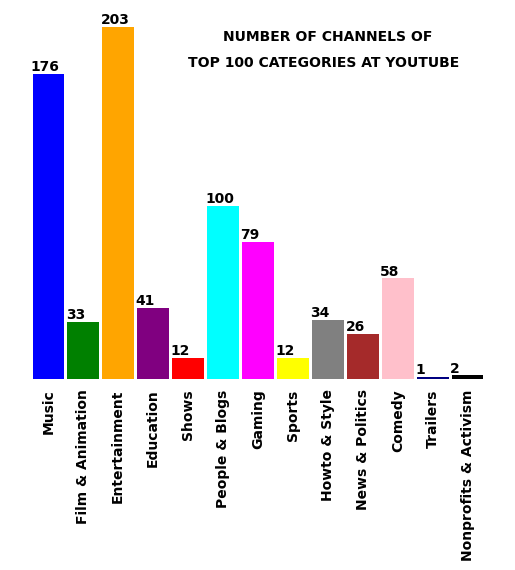

In [30]:
pyp.yticks([])
pyp.tick_params(bottom = False, left = False)
ax = pyp.gca()
for location in ["left","right","bottom","top"]:
    ax.spines[location].set_visible(False)
colors = ['blue', 'green', 'orange', 'purple', 'red', 'cyan', 'magenta', \
          'yellow', 'gray', 'brown', 'pink', 'navy', 'black', 'maroon']
for index,cat in enumerate(top_100_cats):
    pyp.bar(cat,len(data[data.category == cat]),color=colors[index],width=0.9)
    ax.text(index-0.5,len(data[data.category == cat])+2,len(data[data.category == cat]),\
            weight='bold')
ax.text(5,195,'NUMBER OF CHANNELS OF',weight='bold')
ax.text(4,180,'TOP 100 CATEGORIES AT YOUTUBE',weight='bold')
pyp.xticks(rotation=90,fontsize=10,weight='bold')
pyp.show()

In [31]:
top_100_cats

array(['Music', 'Film & Animation', 'Entertainment', 'Education', 'Shows',
       'People & Blogs', 'Gaming', 'Sports', 'Howto & Style',
       'News & Politics', 'Comedy', 'Trailers', 'Nonprofits & Activism'],
      dtype=object)

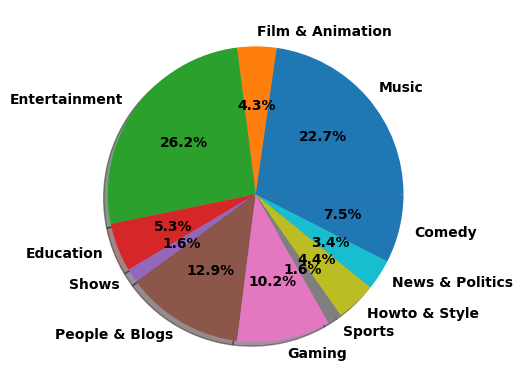

In [32]:
per=[]
temp_top_100_cats = top_100_cats[:-2]
for index,cat in enumerate(temp_top_100_cats):
    per.append(len(data[data.category == cat]))
per = np.array(per)
pyp.pie(per,labels = temp_top_100_cats,textprops={'weight': 'bold'},autopct='%1.1f%%',shadow=True)
# pyp.legend()
pyp.show()

In [33]:
data.Country.unique()

array(['India', 'United States', 'Japan', 'Russia', 'South Korea',
       'United Kingdom', 'Canada', 'Argentina', 'Chile', 'Cuba',
       'El Salvador', 'Brazil', 'Pakistan', 'Philippines', 'Thailand',
       'Colombia', 'Barbados', 'Mexico', 'United Arab Emirates', 'Spain',
       'Saudi Arabia', 'Indonesia', 'Turkey', 'Venezuela', 'Kuwait',
       'Jordan', 'Netherlands', 'Australia', 'Italy', 'Germany', 'France',
       'Sweden', 'Ukraine', 'Latvia', 'Switzerland', 'Vietnam',
       'Malaysia', 'China', 'Iraq', 'Singapore', 'Egypt', 'Andorra',
       'Ecuador', 'Morocco', 'Peru', 'Bangladesh', 'Finland', 'Samoa'],
      dtype=object)

In [34]:
asian_countries = ['India', 'Indonesia', 'South Korea','Russia', 'Saudi Arabia','United Arab Emirates', 'Pakistan', 'Japan', 'Turkey',\
                   'Jordan', 'Iraq', 'Singapore', 'Egypt','Kuwait', 'China']

In [35]:
count = 0
for cont in data.Country.unique():
    if cont in asian_countries:
        count += len(data[data.Country == cont])

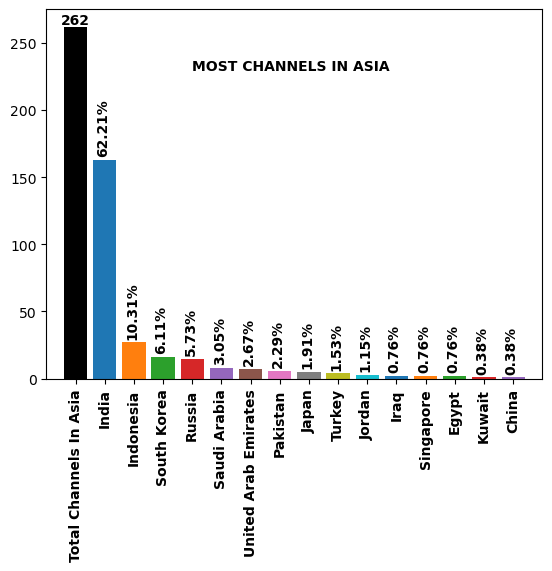

In [36]:
pyp.xlim(-1,16)
pyp.bar('Total Channels In Asia',count,color='black')
ax = pyp.gca()
ax.text(-0.5,count+2,count,weight='bold')
for index,cont in enumerate(asian_countries):
    if cont in asian_countries:
        pyp.bar(cont,len(data[data.Country == cont]),width=0.8)
        ax.text(index+0.7,len(data[data.Country == cont])+5,\
               (str(round((len(data[data.Country == cont])*100)/count,2))+'%'),weight='bold',\
               rotation=90)
pyp.xticks(rotation=90,fontsize=10,weight='bold')
ax.text(4,230,'MOST CHANNELS IN ASIA',weight='bold')
pyp.show()

In [37]:
for_corr = data.select_dtypes(exclude='object').iloc[:,1:]
for_corr

,subscribers,video views,uploads,country_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,created_year
0,245000000,228000000000.00,20082,1.00,2258000000.00,564600.00,9000000.00,6800000.00,108400000.00,2000000.00,2006.00
1,170000000,0.00,1,7670.00,0.00,0.00,0.05,0.04,0.58,42500000.00,2006.00
2,166000000,28368841870.00,741,1.00,1348000000.00,337000.00,5400000.00,4000000.00,64700000.00,8000000.00,2012.00
3,162000000,164000000000.00,966,2.00,1975000000.00,493800.00,7900000.00,5900000.00,94800000.00,1000000.00,2006.00
4,159000000,148000000000.00,116536,2.00,1824000000.00,455900.00,7300000.00,5500000.00,87500000.00,1000000.00,2006.00
...,...,...,...,...,...,...,...,...,...,...,...
990,12300000,9029609749.00,1200,55.00,552513000.00,138100.00,2200000.00,1700000.00,26500000.00,700000.00,2017.00
991,12300000,1674409945.00,1500,125.00,64735000.00,16200.00,258900.00,194200.00,3100000.00,300000.00,2018.00
992,12300000,2214684303.00,2452,867.00,67035.00,17.00,268.00,201.00,3200.00,1000.00,2006.00
993,12300000,374123483.00,39,4.00,3871000.00,968.00,15500.00,11600.00,185800.00,100000.00,2012.00


# CORRELATIONS BETWEEN RANK OF CHANNEL WITH OTHER FEATURES

In [38]:
temp = []
for col in for_corr.columns:
    temp.append(data['rank'].corr(data[col]))

In [39]:
temp

[-0.6346069192697033,
 -0.4676240587773733,
 -0.05911462723720223,
 0.020142098057510483,
 -0.12883856815423325,
 -0.2900870283262248,
 -0.2896217647736328,
 -0.2902914780390726,
 -0.2901073589305993,
 -0.12203056412821278,
 0.1114687532182973]

In [40]:
for_corr.columns

Index(['subscribers', 'video views', 'uploads', 'country_rank',
       'video_views_for_the_last_30_days', 'lowest_monthly_earnings',
       'highest_monthly_earnings', 'lowest_yearly_earnings',
       'highest_yearly_earnings', 'subscribers_for_last_30_days',
       'created_year'],
      dtype='object')

In [41]:
data = data.reset_index(drop=True)

# TRAINING DATA TO MACHINE

In [42]:
xtrain,xtest,ytrain,ytest = train_test_split(data[['subscribers','video views','uploads','country_rank',\
                      'video_views_for_the_last_30_days','lowest_monthly_earnings',\
                    'highest_monthly_earnings','lowest_yearly_earnings',\
                    'highest_yearly_earnings', 'subscribers_for_last_30_days',\
                    'created_year']],data['rank'])

In [43]:
xtrain

,subscribers,video views,uploads,country_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,created_year
419,17300000,1026425106.00,180,130.00,46484000.00,11600.00,185900.00,139500.00,2200000.00,100000.00,2005.00
341,19400000,1577859332.00,85,14.00,2382000.00,595.00,9500.00,7100.00,114300.00,100000.00,2017.00
41,47500000,30788679536.00,3322,1.00,306540000.00,76600.00,1200000.00,919600.00,14700000.00,700000.00,2006.00
279,21300000,10047736580.00,669,67.00,236293000.00,59100.00,945200.00,708900.00,11300000.00,600000.00,2021.00
575,14900000,439098.00,1,10.00,109774.50,2.00,31.00,23.00,369.00,3725000.00,2008.00
...,...,...,...,...,...,...,...,...,...,...,...
716,13400000,10022557589.00,319,165.00,397715000.00,99400.00,1600000.00,1200000.00,19100000.00,500000.00,2014.00
266,21800000,12140232004.00,266,14.00,3035058001.00,12800.00,204500.00,153400.00,2500000.00,5450000.00,2010.00
534,15200000,6391679636.00,5056,102.00,57809000.00,14500.00,231200.00,173400.00,2800000.00,200000.00,2012.00
491,15900000,9962188084.00,2035,142.00,2490547021.00,2500.00,39700.00,29700.00,475900.00,3975000.00,2016.00


In [44]:
ytrain

419    520
341    422
41      47
279    347
575    701
      ... 
716    859
266    329
534    655
491    608
396    492
Name: rank, Length: 623, dtype: int64

In [45]:
model = LinearRegression()

In [46]:
model.fit(xtrain,ytrain)

LinearRegression()

# MODEL TESTING

In [47]:
model.predict(xtest)

array([  564.9559395 ,   615.82395116,   593.19356737,   575.5168335 ,
         400.48929282,   731.10980413,   654.13054932,   383.57301764,
         569.15778707,   457.16067265,   592.54385653,   626.38181685,
         622.92773894,   588.17167306,   613.77213163,   629.78900769,
         510.10419974,   619.63157225,   614.2897122 ,   629.53319142,
         601.9754769 ,   591.57441162,   639.3703765 ,   496.88518933,
         342.21207008,   544.64161343,   632.95197971,   602.21243103,
         633.64249625,   586.66821928,   340.88248617,   282.72111244,
         464.72639185,   173.28564976,   354.44343955,   658.54446662,
         617.41356522,   541.09077501,   617.77348398,   648.45408236,
         437.84106111,   579.03225943,   533.80131345,   582.5716261 ,
         470.26495593,   667.31434014,   613.82937804,   541.10754006,
         467.85308237,   608.32622607,   581.21164965,   597.41752906,
           6.93359924,   476.52707026,   625.22365425,   656.87573051,
      

# CORRELATION TABELEU

In [48]:
tabeleu = data[for_corr.columns].corr()
tabeleu

,subscribers,video views,uploads,country_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,created_year
subscribers,1.00,0.79,0.08,0.07,0.19,0.44,0.44,0.44,0.44,0.29,-0.15
video views,0.79,1.00,0.16,-0.05,0.26,0.58,0.58,0.58,0.58,0.02,-0.13
uploads,0.08,0.16,1.00,-0.07,-0.04,0.16,0.16,0.16,0.16,-0.09,-0.17
country_rank,0.07,-0.05,-0.07,1.00,0.11,-0.13,-0.13,-0.13,-0.13,0.27,-0.00
video_views_for_the_last_30_days,0.19,0.26,-0.04,0.11,1.00,0.09,0.09,0.09,0.09,0.69,-0.09
lowest_monthly_earnings,0.44,0.58,0.16,-0.13,0.09,1.00,1.00,1.00,1.00,-0.07,0.07
highest_monthly_earnings,0.44,0.58,0.16,-0.13,0.09,1.00,1.00,1.00,1.00,-0.08,0.07
lowest_yearly_earnings,0.44,0.58,0.16,-0.13,0.09,1.00,1.00,1.00,1.00,-0.08,0.07
highest_yearly_earnings,0.44,0.58,0.16,-0.13,0.09,1.00,1.00,1.00,1.00,-0.07,0.07
subscribers_for_last_30_days,0.29,0.02,-0.09,0.27,0.69,-0.07,-0.08,-0.08,-0.07,1.00,-0.08


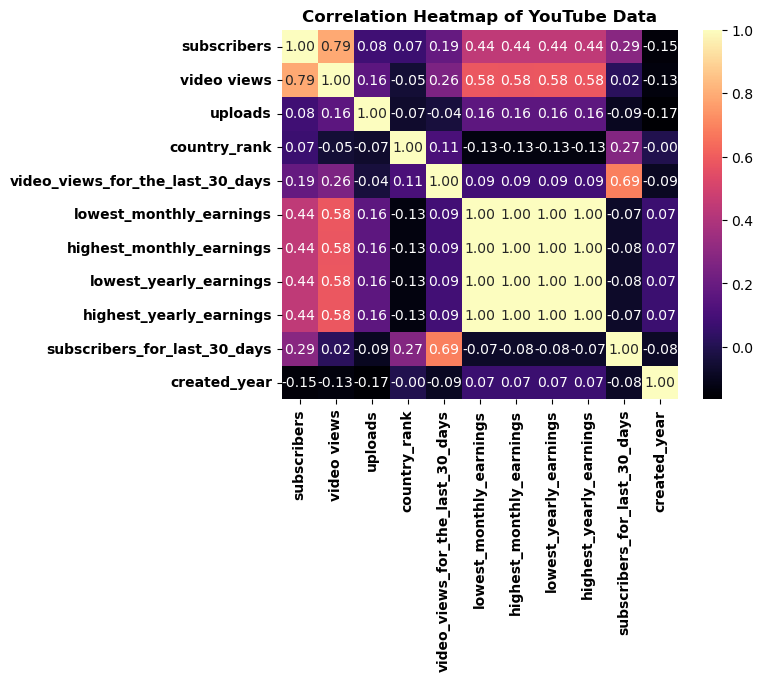

In [49]:
sns.heatmap(tabeleu, annot=True, fmt=".2f", cmap='magma', cbar=True)
pyp.title('Correlation Heatmap of YouTube Data',weight='bold')
pyp.xticks(weight='bold'),pyp.yticks(weight='bold')
pyp.show()